<h1 style="color: #00000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;">
    Instacart Insights
</h1>
<p style="color: #000000; font-size: 16px; text-align: center; margin-bottom: 20px;">
    A Comprehensive Analysis of Customer Orders and Product Trends
</p>
<hr style="border-top: 1px solid #1e130e; width: 80%;"> 


# **Introduction**

**Instacart** is a popular **grocery delivery platform** that allows customers to place orders from their favorite grocery stores and have the items delivered directly to their doorstep. Similar to services like Uber Eats, DoorDash, or Bolt, Instacart connects customers with personal shoppers who pick and deliver their groceries.

---

# **Dataset Overview**

The dataset provided for analysis is a modified version of the original data. The dataset size has been reduced. In addition, missing values were deliberately introduced and duplicate entries removed. These changes were carefully made to preserve the original data distributions, ensuring that key trends and patterns remain intact for insightful analysis.

---


## 1. Dictionary of Dataset Tables

1. **instacart_orders.csv**
Each row corresponds to an order placed in the Instacart app.  
**Columns:**
- **`order_id`**: Unique identifier for each order.
- **`user_id`**: Unique identifier for the customer’s account.
- **`order_number`**: The number of orders the customer has placed (first, second, etc.).
- **`order_dow`**: Day of the week when the order was placed (0 = Sunday, 1 = Monday, etc.).
- **`order_hour_of_day`**: Hour of the day when the order was placed (24-hour format).
- **`days_since_prior_order`**: Days since the customer placed their last order (NaN for the first order).



2. **products.csv**
Each row represents a unique product available for purchase.  
**Columns:**
- **`product_id`**: Unique identifier for the product.
- **`product_name`**: Name of the product (e.g., "Organic Bananas").
- **`aisle_id`**: ID of the aisle where the product is located.
- **`department_id`**: ID of the department where the product is categorized.



3. **order_products.csv**
Each row corresponds to a product ordered in a specific order.  
**Columns:**
- **`order_id`**: Unique identifier for the order.
- **`product_id`**: Unique identifier for the product.
- **`add_to_cart_order`**: The sequential order in which the item was added to the cart.
- **`reordered`**: Indicator of whether the product was ordered before (0 = no, 1 = yes).



4. **aisles.csv**
Each row corresponds to a grocery aisle category.  
**Columns:**
- **`aisle_id`**: Unique identifier for the aisle.
- **`aisle`**: Name of the aisle (e.g., "Produce", "Dairy").



5. **departments.csv**
Each row corresponds to a grocery department.  
**Columns:**
- **`department_id`**: Unique identifier for the department.
- **`department`**: Name of the department (e.g., "Fresh Produce", "Frozen Foods").

---

## 2. Data Description

The libraries are imported and the files are loaded to create the DataFrames.


### 2.1 Libraries and DataFrames

In [237]:
# Libraries 
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns # For plotting

In [238]:
# Function to read a CSV file and handle errors
def load_data(filename, sep=';'):
    try:
        # Attempt to read the CSV file with the specified separator
        data = pd.read_csv(filename, sep=sep)
        print(f"Successfully loaded {filename}")  # Print success message
        return data  # Return the loaded data
    except FileNotFoundError:
        # Handle case when the file is not found
        print(f"Error: {filename} not found.")
        return None  # Return None if file is not found
    except Exception as e:
        # Handle any other exceptions that may occur during reading
        print(f"Error reading {filename}: {e}")
        return None  # Return None in case of other errors


# Load the datasets
instacart_orders = load_data('instacart_orders.csv')
products = load_data('products.csv')
order_products = load_data('order_products.csv')
aisles = load_data('aisles.csv')
departments = load_data('departments.csv')

Successfully loaded instacart_orders.csv
Successfully loaded products.csv
Successfully loaded order_products.csv
Successfully loaded aisles.csv
Successfully loaded departments.csv


### 2.2 Reviews of DataFrames

#### 2.2.1 First Review of `'instacart_orders'`

In [239]:
# 'Instacart_orders' DataFrame
print("Instacart Orders  DataFrame - Info:\n")

# Display DataFrame Info
instacart_orders.info()

# Missing values for 'instacart_orders'
missing_values = instacart_orders.isnull().sum()
missing_summary = missing_values[missing_values > 0]

if not missing_summary.empty:
    print("\nMissing Values Summary:")
    print(missing_summary)
else:
    print("\nNo missing values in the dataset.")

Instacart Orders  DataFrame - Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

Missing Values Summary:
days_since_prior_order    28819
dtype: int64


**Review**

The **Instacart Orders DataFrame** has:
- **478,967 rows** and **6 columns**.
- **Data types**: 5 columns are integers, and 1 column (`days_since_prior_order`) is a float.

**Missing Values**:
- The `days_since_prior_order` column has **28,819 missing values** likely due to users’ first orders, where no prior order exists.
---


#### 2.2.2  First Review of `'products'`

In [240]:
# 'Products' DataFrame
print("Product DataFrame - Info:\n")
products.info()

# Missing values check for 'products'
missing_values_products = products.isnull().sum()
missing_summary_products = missing_values_products[missing_values_products > 0]
if not missing_summary_products.empty:
    print("\nMissing Values Summary:")
    print(missing_summary_products)
else:
    print("\nNo missing values in the dataset.")

Product DataFrame - Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

Missing Values Summary:
product_name    1258
dtype: int64


**Review**

The **Products DataFrame** has:
- **49,694 rows** and **4 columns**.
- **Data types**: 3 columns are integers (`product_id`, `aisle_id`, `department_id`), and 1 column (`product_name`) is an object (string).

**Missing Values**:
- The `product_name` column has **1,258 missing values**.
---


#### 2.2.3 First Review of `'order_products'`

In [241]:
# 'Order_products' DataFrame
print("Orders Products DataFrame - Info:\n")
order_products.info()

# Missing values check for 'order_products'
missing_values_orders = order_products.isnull().sum()
missing_summary_orders = missing_values_orders[missing_values_orders > 0]
if not missing_summary_orders.empty:
    print("\nMissing Values Summary:")
    print(missing_summary_orders)
else:
    print("\nNo missing values in dataset.")

Orders Products DataFrame - Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

Missing Values Summary:
add_to_cart_order    836
dtype: int64


**Review**

The **Order Products DataFrame** has:
- **4,545,007 rows** and **4 columns**.
- **Data types**: 3 columns are integers, and `add_to_cart_order` is a float.

**Missing Values**:
- The `add_to_cart_order` column has **836 missing values**.
---


#### 2.2.4 First Review of `'aisles'`

In [242]:
# 'Aisles' DataFrame
print("Aisles DataFrame - Info:\n")
aisles.info()

# Missing values check for 'aisles'
missing_values_aisles = aisles.isnull().sum()
missing_summary_aisles = missing_values_aisles[missing_values_aisles > 0]
if not missing_summary_aisles.empty:
    print("\nMissing Values Summary:")
    print(missing_summary_aisles)
else:
    print("\nNo missing values in dataset.")

Aisles DataFrame - Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

No missing values in dataset.


**Review**

The **Aisles DataFrame** has:
- **134 rows** and **2 columns**.
- **Data types**: `aisle_id` is an integer, and `aisle` is an object (string).

**Missing Values**:
- There are **no missing values** in this dataset.
---


#### 2.2.5 First Review of `'departments'`

In [243]:
# 'Departments' DataFrame
print("Departments DataFrame - Info:\n")
departments.info()

# Missing values check for 'departments'
missing_values_departments = departments.isnull().sum()
missing_summary_departments = missing_values_departments[missing_values_departments > 0]
if not missing_summary_departments.empty:
    print("\nMissing Values Summary for :")
    print(missing_summary_departments)
else:
    print("\nNo missing values in dataset.")

Departments DataFrame - Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

No missing values in dataset.


**Review**

The **Departments DataFrame** has:
- **21 rows** and **2 columns**.
- **Data types**: `department_id` is an integer, and `department` is an object (string).

**Missing Values**:
- There are **no missing values** in this dataset.
---


## 3. Data preprocessing

Data is processed as follows:

- Check and correct data types (for example, make sure ID columns are integers).
- Identify and complete missing values.
- Identify and remove duplicate values.

---
When checking the information in DataFrames, the columns that end in ID are integers because of the Dtype: int64. To check the data type of a variable, use the 'type()' function. If necessary, use the 'to_numeric()' function to convert strings to int or float. To find duplicates, use the 'duplicated()' function together with sum(), or 'value_counts()'. To eliminate them, use the 'duplicated()' function.

### 3.1 Duplicate values

**Duplicate values will be searched for and treated accordingly**.

#### 3.1.1 Duplicates in `'instacart_orders'` DataFrame

In [244]:
# Check for duplicate orders
duplicate_instacart_orders_count = instacart_orders.duplicated().sum()

if duplicate_instacart_orders_count > 0:
    print(f"Total duplicate orders found: {duplicate_instacart_orders_count}")
    # Display the duplicate rows
    duplicate_orders = instacart_orders[instacart_orders.duplicated(keep=False)]
    display(duplicate_orders)
else:
    print("No duplicate orders found.")

Total duplicate orders found: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


**Duplicates are marked with the same day and time**. The `'order_dow'` = 3 corresponds to Wednesday, and `'order_hour_of_day'` = 2 corresponds to 2:00 a.m. Let's explore more.

In [245]:
# Select orders placed on Wednesday at 2:00 a.m.
# 'order_dow' = 3 corresponds to Wednesday
# 'order_hour_of_day' = 2 corresponds to 2:00 a.m.

wednesday_2am_orders = instacart_orders[
    (instacart_orders['order_dow'] == 3) &  # Wednesday (day 3)
    (instacart_orders['order_hour_of_day'] == 2)  # 2:00 a.m.
]


# Results
print("Total orders placed on Wednesday at 2:00 a.m.:")
wednesday_2am_orders

Total orders placed on Wednesday at 2:00 a.m.:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


These duplicates can be caused by a technical error, customer behavior, or a data problem. Now let's delete them.


In [246]:
# Remove duplicates
instacart_orders.drop_duplicates(inplace=True)

# Check the number of duplicates after removal
duplicate_instacart_orders_count_after = instacart_orders.duplicated().sum()
print(f"Duplicated orders after removal: {duplicate_instacart_orders_count_after}")

Duplicated orders after removal: 0


In [247]:
# Remove the duplicate order IDs
instacart_orders.drop_duplicates(subset='order_id', inplace=True)

# Re-check the number of duplicate 'order_id' values after removal
duplicate_order_id_after = instacart_orders['order_id'].duplicated().sum()
print(f"Duplicate order IDs after removal: {duplicate_order_id_after}")

Duplicate order IDs after removal: 0


#### 3.1.2 Duplicates in `'products'`  DataFrame

In [248]:
# Check if there are duplicate rows in the 'products' DataFrame

duplicate_products = products.duplicated().sum()
print(f"Total duplicate in 'products': {duplicate_products}")

Total duplicate in 'products': 0


In [249]:
# Check if there are duplicate rows in the 'IDs' in 'products' DataFrame

duplicate_product_id = products['product_id'].duplicated().sum() 
print(f"Total duplicate ID's': {duplicate_product_id}")

Total duplicate ID's': 0


In [250]:
# Check for just duplicate product names (convert names to uppercase to compare better)
products['product_name'].str.upper().duplicated().sum()

1361

In [251]:
# Filter out rows where 'product_name' is NaN, convert to uppercase, and check for duplicates
duplicate_products = products[products['product_name'].notna() & products['product_name'].str.upper().duplicated(keep=False)]

# Sort by product name 
duplicate_products_sorted = duplicate_products.sort_values('product_name')
# Display the result
duplicate_products_sorted

,product_id,product_name,aisle_id,department_id
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
13152,13153,Aged Balsamic Vinegar of Modena,19,13
22582,22583,Albacore Solid White Tuna In Water,95,15
...,...,...,...,...
40093,40094,Wild Sardines In Spring Water,95,15
21366,21367,Wild Sardines in Spring Water,95,15
38260,38261,Yams Cut Sweet Potatoes In Syrup,81,15
1826,1827,Yams Cut Sweet Potatoes in Syrup,81,15


The dataset shows that **multiple records for the same product** exist, likely representing **different variations of the product**, and since there are very few entries, we will leave them as they are.

#### 3.1.3 Duplicates in   `'departments'`  DataFrame 

In [252]:
# Count and display the number of fully duplicated rows in the 'departments' DataFrame
total_duplicates = departments.duplicated(keep=False).sum()
print(f"Number of duplicated rows: {total_duplicates}")

Number of duplicated rows: 0


In [253]:
# Count and display the number of duplicated 'department_id' entries in the 'departments' DataFrame
total_duplicated_ids = departments['department_id'].duplicated(keep=False).sum()
print(f"Number of duplicated department IDs: {total_duplicated_ids}")

Number of duplicated department IDs: 0


**There are no duplicates**.

#### 3.1.4 Duplicates in  `'aisles'`  DataFrame

In [254]:
# Count and display the number of fully duplicated rows in the 'aisles' DataFrame
total_aisles_duplicates = aisles.duplicated(keep=False).sum()
print(f"Number of duplicated rows in 'aisles': {total_aisles_duplicates}")

Number of duplicated rows in 'aisles': 0


In [255]:
# Count and display the number of duplicated 'aisle_id' entries in the 'aisles' DataFrame
total_duplicated_aisle_ids = aisles['aisle_id'].duplicated(keep=False).sum()
print(f"Number of duplicated aisle IDs: {total_duplicated_aisle_ids}")

Number of duplicated aisle IDs: 0


**There are no duplicates**.

#### 3.1.5  Duplicates in  `'order_products'` DataFrame

In [256]:
# Count and display the number of fully duplicated rows in the 'order_products' DataFrame
total_order_products_duplicates = order_products.duplicated(keep=False).sum()
print(f"Number of duplicated rows in 'order_products': {total_order_products_duplicates}")

Number of duplicated rows in 'order_products': 0


In [257]:
# Count and display the number of duplicated rows (not necessarily fully duplicated) in 'order_products' DataFrame
total_order_products_partial_duplicates = order_products.duplicated().sum()
print(f"Number of partially duplicated rows in 'order_products': {total_order_products_partial_duplicates}")


Number of partially duplicated rows in 'order_products': 0


**There are no duplicates**.

### 3.2 Missing values

**Missing values will be searched for and treated accordingly**.
 
---  
To ensure data quality, we examined specific columns in our tables for missing values. This investigation helps us identify any gaps that may need handling before analysis. The following columns were checked:

- **`product_name` in the `products` table**: Missing values in this column could indicate products without a defined name, which may affect item-level analysis.
- **`days_since_prior_order` in the `orders` table**: Missing values here could represent first-time orders or incomplete order data.
- **`add_to_cart_order` in the `order_products` table**: Missing values in this column may indicate products added to orders without a defined sequence.

#### 3.2.1 Missing values in  `'products'` DataFrame 

In [258]:
# Filter the DataFrame to show only products with missing names
missing_products_df = products[products['product_name'].isnull()]

# Display the DataFrame with missing products
print("DataFrame of products with missing names:")
print(missing_products_df.sample(10))

DataFrame of products with missing names:
       product_id product_name  aisle_id  department_id
30166       30167          NaN       100             21
33270       33271          NaN       100             21
24283       24284          NaN       100             21
41753       41754          NaN       100             21
10138       10139          NaN       100             21
11355       11356          NaN       100             21
33264       33265          NaN       100             21
32956       32957          NaN       100             21
14230       14231          NaN       100             21
33370       33371          NaN       100             21


There are a total of **1258 missing values** in the `'product_name'` column of the `'products'` DataFrame. There is a large coincidence of missing values in the same `'aisle_id'` = 100 and `'department_id'` = 21. Let's explore more on that.

In [259]:
# Are all missing product names related to aisle with ID 100?

missing_products = products[products['product_name'].isnull()]# Filter rows where product name is missing (NaN)
aisle_100 = (missing_products['aisle_id'] == 100).all()# Check if all missing products are in aisle with ID 100

if aisle_100:
    print("All missing products are in aisle with ID 100.")
else:
    print("Not all missing products are in aisle with ID 100.")

All missing products are in aisle with ID 100.


In [260]:
# Are all missing product names related to department with ID 21?

department_products_absent = departments[departments['department_id'].isnull()]# Filter rows where product name is absent (NaN)
department_products_absent = (department_products_absent ['department_id'] == 21).all()# Check if all missing products are in aisle with ID 100

if department_products_absent :
    print("All missing products are in department with ID 21.")
else:
    print("Not all missing products are in department with ID 21.")

All missing products are in department with ID 21.


In [261]:
# Calculate the percentage of missing values in the 'product_name' column
missing_percentage = products['product_name'].isnull().mean() * 100

# Results
print(f"Percentage of missing values in 'product_name': {missing_percentage:.2f}%")


Percentage of missing values in 'product_name': 2.53%


The percentage of missing values is relatively low, but we will not delete these rows, we will fill them with 'unknown'.

In [262]:
# Replace missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Check if there are any missing values left in 'product_name' after replacement
missing_after_replacement = products['product_name'].isnull().sum()

# Result
print(f"Number of missing product names after replacement: {missing_after_replacement}")

Number of missing product names after replacement: 0


#### 3.2.2  Missing values in  `'orders'` DataFrame  

In [263]:
# Encuentra los valores ausentes
valores_ausentes_order_products = order_products.isnull().sum()

print(valores_ausentes_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [264]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


order_products.sort_values(by=['order_id', 'add_to_cart_order'], inplace=True) #ordenar los datos con sort_values()

first_orders = order_products.groupby('order_id').first().reset_index() # groupby() para agrupar conforme a lo pedido, y reset_index()

non_first_orders = order_products[~order_products.index.isin(first_orders.index)] # utilizar '~' para indicar que no sea el primero pedido

valores_ausentes_non_first = non_first_orders.isnull().sum() #validar NaN que no sean del primer pedido

print("Valores ausentes que no sean en el primer pedido:")
print(valores_ausentes_non_first)



Valores ausentes que no sean en el primer pedido:
order_id               0
product_id             0
add_to_cart_order    756
reordered              0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Encontré valores ausentes y encontré valores ausentes que nosean del primer pedido.

#### 3.2.3 Missing values in  `'order_products'` DataFrame  

In [265]:
# Filter the DataFrame to show only 'add_to_cart_order' with missing names
missing_add_to_cart_df = order_products[order_products['add_to_cart_order'].isnull()]

# Display the DataFrame with missing products
print("DataFrame of 'add_to_cart_order' with missing names:\n")
print(missing_add_to_cart_df)

DataFrame of 'add_to_cart_order' with missing names:

         order_id  product_id  add_to_cart_order  reordered
2437093      9310       25753                NaN          0
57981       61355        5322                NaN          0
247893      61355        8594                NaN          0
381535      61355       12315                NaN          0
399791      61355       10199                NaN          0
...           ...         ...                ...        ...
1038616   3383594       15424                NaN          1
1537276   3383594       15076                NaN          0
2772397   3383594       46710                NaN          0
3760909   3383594          63                NaN          0
3784932   3383594       49144                NaN          1

[836 rows x 4 columns]


There are **836 missing values** in this DataFrame.

In [266]:
# Minimum and maximum values in this column
order_products_min = order_products['add_to_cart_order'].min()
order_products_max = order_products['add_to_cart_order'].max()

print("Minimum values:")
print(order_products_min)
print("\nMaximum values")
print(order_products_max)

Minimum values:
1.0

Maximum values
64.0


The minimum purchase amount for items is **1**, with a maximum of **65**.

In [267]:
# Filter order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_cart_order = order_products[order_products['add_to_cart_order'].isnull()]['order_id']

# Display the top 10 order IDs with the most occurrences of missing values
top_missing_order_counts = order_products[order_products['order_id'].isin(orders_with_missing_cart_order)]['order_id'].value_counts().head(10)
print("Top 10 orders with missing 'add_to_cart_order' values:")
print(top_missing_order_counts)

# Get the minimum number of products in an order with missing 'add_to_cart_order'
min_products_in_missing_orders = order_products[order_products['order_id'].isin(orders_with_missing_cart_order)]['order_id'].value_counts().min()
print(f"\nThe minimum number of products in an order with missing 'add_to_cart_order' is: {min_products_in_missing_orders}")


Top 10 orders with missing 'add_to_cart_order' values:
order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
102236      95
1730767     95
2926893     92
1800005     92
1386261     91
Name: count, dtype: int64

The minimum number of products in an order with missing 'add_to_cart_order' is: 65


In [268]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

# Verify the changes
missing_values_summary = order_products.isnull().sum()

# Results
print("Total missing values per column in 'order_products':\n")
print(missing_values_summary)

Total missing values per column in 'order_products':

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


### 3.3  Conclusion:

During this process, the quality of the data was analyzed, the way in which the DataFrames were structured was reviewed, null values were treated, dtype conversion, and data filtering.
The data had to be processed mainly by finding and eliminating duplicates,  and filling in missing values.

The data was transformed in order to find a viable use for its analysis.

---

## 4. Data Analysis 

### 4.1  Analyzing Order Patterns: Hour, Day, and Reorder Behavior
What will be analyzed: 

4.1.1. Verify that the values in the columns `'order_hour_of_day'` and `'order_dow'` in the orders table are reasonable (i.e., `'order_hour_of_day'` should be between 0 and 23, and `'order_dow'` should be between 0 and 6).

4.1.2. Create a chart showing the number of people placing orders based on the time of day.

4.1.3. Create a chart showing which day of the week people tend to make their purchases.

4.1.4. Create a chart showing the time people wait before making their next order, and comment on the minimum and maximum values.

---

#### 4.1.1 Verify that the values in the columns `'order_hour_of_day'` and `'order_dow'` in the orders table are reasonable 

In [269]:
# Get the unique hour in sorted order
unique_hours =  instacart_orders['order_hour_of_day'].unique()
sorted_unique_hours = sorted(unique_hours)  # Sort the hours in ascending order

print("Unique hours:", sorted_unique_hours)

Unique hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [270]:
# Get the unique days in sorted order
unique_days = instacart_orders['order_dow'].unique()
sorted_unique_days = sorted(unique_days)  # Sort the unique days in ascending order

print("Unique days:", sorted_unique_days)

Unique days: [0, 1, 2, 3, 4, 5, 6]


The following is specified in the dictionary:

" `order_dow`: Day of the week when the order was placed (0 = Sunday, 1 = Monday, etc.), and `order_hour_of_day`: Hour of the day when the order was placed (24-hour format). " 


We can check that the data corresponds to what is expected by seeing
according to the dictionary.

---

#### 4.1.2 For each hour of the day, how many people place orders?

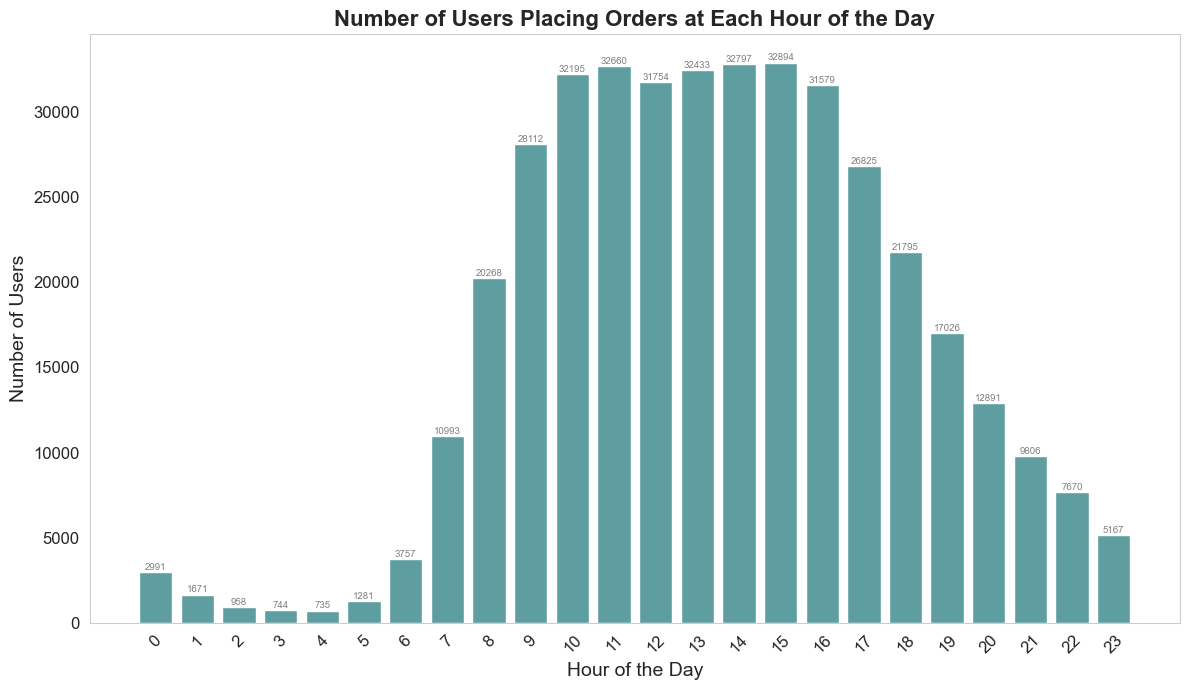

In [271]:
# Group by the hour of the day and count how many unique users placed orders in each hour
orders_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()


# Bar chart
plt.figure(figsize=(12, 7))

# Create a bar plot with a more appealing color palette
plt.bar(orders_per_hour.index, orders_per_hour.values, color='cadetblue', edgecolor='white')

# Title and axis labels
plt.title('Number of Users Placing Orders at Each Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)# Display each hour on the x-axis
plt.yticks(fontsize=12)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

# Adding labels on top of bars for better insight
for i, value in enumerate(orders_per_hour.values):
    plt.text(orders_per_hour.index[i], value + 5, str(value), ha='center', va='bottom', fontsize=7, color='gray')

# Remove the grid
plt.grid(False)
# Adjust layout to prevent clipping
plt.tight_layout()
# Show the plot
plt.show()

**Analysis of Order Patterns by Hour**

It is expected that the number of orders will be lower during the hours typically associated with sleep, such as between **11 PM (23:00)** and **6 AM (06:00)**. However, starting from **7 AM (07:00)**, sales increase significantly, reaching a total of **10,993 orders**.

At **8 AM (08:00)**, the number of sales doubles to **20,268**, and from there, sales remain high until **4 PM (16:00)**. After **5 PM (17:00)**, there is a gradual decline in sales, which continues until **10 PM (22:00)**.

The peak sales hours are as follows:

1. **3 PM (15:00)**: The highest number of sales, with a total of **32,894 orders**.
2. **2 PM (14:00)**: A close second with **32,797 orders**.
3. **11 AM (11:00)**: In third place with **32,660 orders**.

---


#### 4.1.3 What day of the week do people buy groceries?

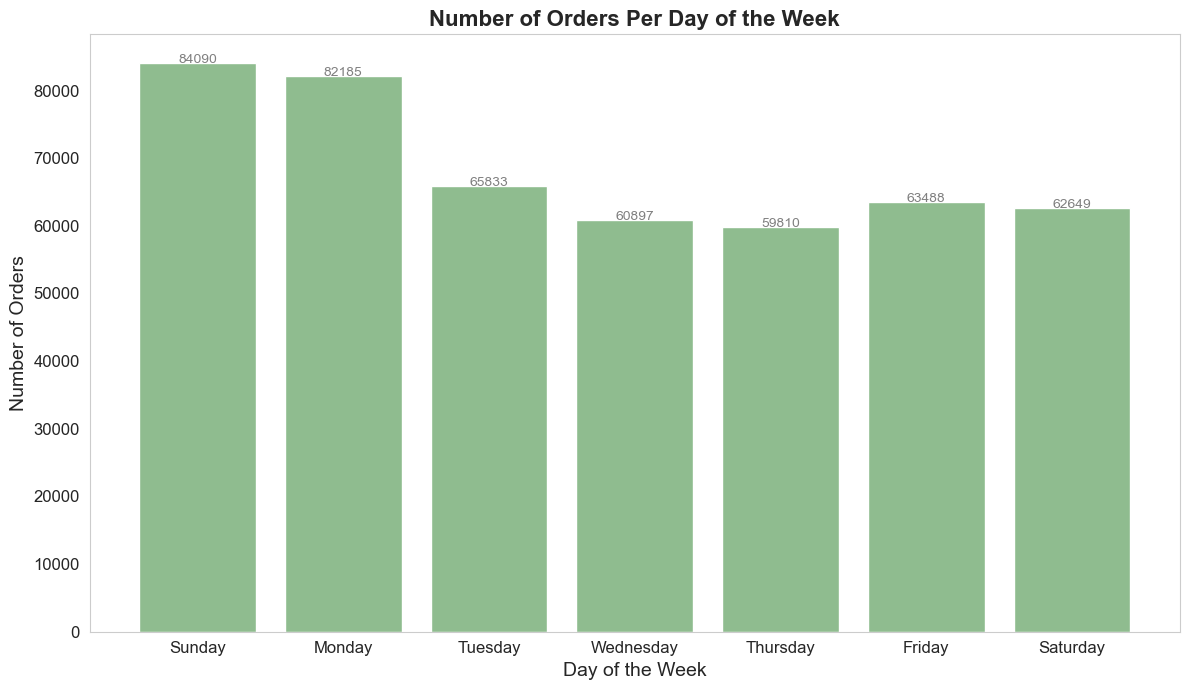

In [301]:
# Group by day of the week and count the number of orders
orders_per_day = instacart_orders.groupby('order_dow')['order_id'].count()

# Labels for the days of the week (0 = Sunday, 6 = Saturday)
days_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Bar chart
plt.figure(figsize=(12, 7))
plt.bar(orders_per_day.index, orders_per_day.values, color='darkseagreen', edgecolor='white', width=0.8)

# Title and Axis labels
plt.title('Number of Orders Per Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(orders_per_day.index, days_labels, fontsize=12)
plt.yticks(fontsize=12)


# Add a value label at the top of each bar
for i, v in enumerate(orders_per_day.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10, color='gray')

# Remove the grid
plt.grid(False)
# Adjust layout to prevent clipping
plt.tight_layout()
# Show the plot
plt.show()

**Analysis of Order Patterns by Day** 

- **Sunday and Monday** have the highest number of orders, with 84,090 and 82,185, respectively.
- **Tuesday and Wednesday** show a noticeable drop, with 65,833 and 60,897 orders.
- **Thursday** has the lowest order count at 59,810.
- Orders start to rise again on **Friday** (63,488) and **Saturday** (62,649).

This pattern suggests that orders peak on weekends and early in the week (friday to monday).

---

#### 4.1.4 How long do people wait to place another order? 

In [273]:
# Calculate the min, max, and average of the 'days_since_prior_order' column
min_days = instacart_orders['days_since_prior_order'].min()
max_days = instacart_orders['days_since_prior_order'].max()
avg_days = instacart_orders['days_since_prior_order'].mean()

# Print the results
print(f"Minimum days since prior order: {min_days}")
print(f"Maximum days since prior order: {max_days}")
print(f"Average days since prior order: {avg_days:.2f}")


Minimum days since prior order: 0.0
Maximum days since prior order: 30.0
Average days since prior order: 11.10


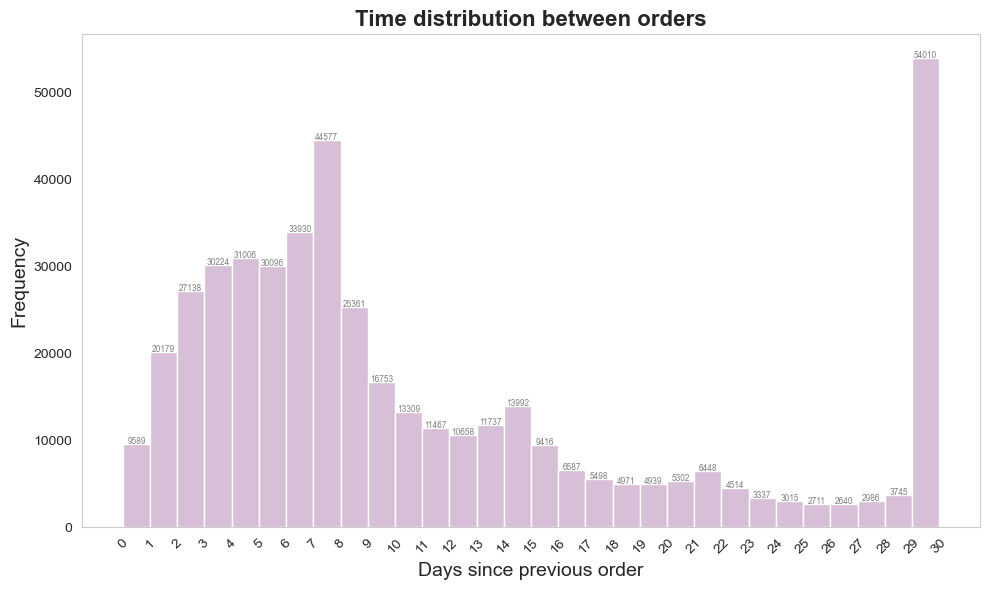

In [302]:
# Filter rows where 'days_since_prior_order' is not null
instacart_orders_filtered = instacart_orders[instacart_orders['days_since_prior_order'].notna()]

# Define bin edges to focus on the 0-30 day range
bins = range(0, 31)  # Creates bins from 0 to 30 (inclusive)

plt.figure(figsize=(10, 6))

# Plotting the histogram 
counts, bins_edges, patches = plt.hist(instacart_orders_filtered['days_since_prior_order'], bins=bins, edgecolor='white', color='thistle')
plt.xticks(range(0, 31))  # Set x-axis labels to show from 0 to 30
plt.xticks(rotation=45)

# Add total count above each bin
for count, edge in zip(counts, bins_edges[:-1]):  # Exclude last edge since no bar for it
    plt.text(edge + 0.5, count + 0.5, str(int(count)), ha='center', color='gray', fontsize=6)

# Title and labels
plt.title('Time distribution between orders', fontsize=16, fontweight='bold')
plt.xlabel('Days since previous order', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove the grid
plt.grid(False)
# Adjust layout to prevent clipping
plt.tight_layout()
# Show the plot
plt.show()

**Analysis of Order Patterns by Reorder Spans**

- **Most orders** are placed **7 days after the previous one**, suggesting a **weekly shopping pattern**.
- A **significant number of orders** occur after **30 days**, indicating **monthly purchases**.
- **Frequencies decrease gradually** as the days since the last order increase, apart from the **spikes at 7 and 30 days**.


This pattern suggests that customers tend to shop weekly or monthly.

---

#### 4.1.5 Difference between Wednesday and Saturday for `'order_hour_of_day'`.  
Plot bar charts for the two days and describe the differences you see.

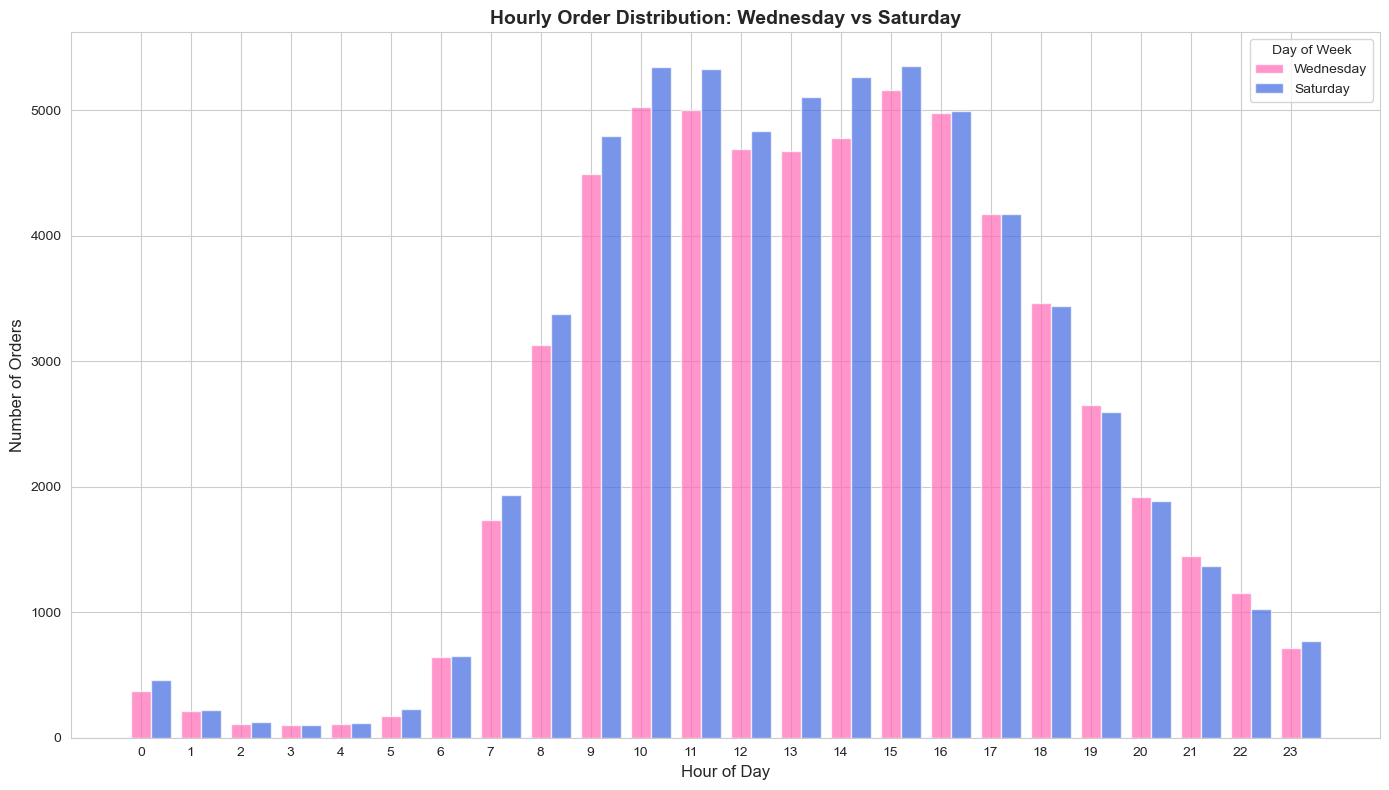

In [275]:
# Filter data for Wednesday (3) and Saturday (5)
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 5]

# Calculate hourly frequencies for Wednesday and Saturday
wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Create a range to cover all hours of the day (0-23)
hours = range(24)

# Set Seaborn white grid style
sns.set_style("whitegrid")

# Ensure that all hours are represented, even those with zero orders
wednesday_hour_counts = wednesday_hour_counts.reindex(hours, fill_value=0)
saturday_hour_counts = saturday_hour_counts.reindex(hours, fill_value=0)

# Bar chart
plt.figure(figsize=(14, 8))  # Increased figure size

# Bar graph for Wednesday orders
plt.bar(hours, wednesday_hour_counts, width=0.4, label='Wednesday', align='center', alpha=0.7, color='hotpink', edgecolor='white')

# Bar graph for Saturday orders
plt.bar([h + 0.4 for h in hours], saturday_hour_counts, width=0.4, label='Saturday', align='center', alpha=0.7, color='royalblue', edgecolor='white')

# Labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Hourly Order Distribution: Wednesday vs Saturday', fontsize=14, fontweight='bold')

# Customize x-axis to show each hour
plt.xticks(hours, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Day of Week")

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

**Analysis of Hourly Order Distribution: Wednesday vs Saturday**

Comparison of the hourly distribution of orders on **Wednesday** (pink) and **Saturday** (blue):

- Both days show a **similar pattern**, with orders increasing from early morning and peaking around **midday (10 AM to 2 PM)**.
- Orders gradually decrease after the peak, with **fewer orders in the evening and late night**.
- **Saturday** generally has slightly higher order counts than **Wednesday** during peak hours, suggesting **increased activity on weekends**.
- This indicates that most orders are placed in the **late morning to early afternoon**, with **Saturday seeing a bit more volume**.

---


### 4.2 Exploring Popular Products and Customer Order Patterns in Instacart Data

4.2.1. **Distribution of Orders per Customer**: The number of orders each customer has placed is investigated and the distribution of these order counts will be examined.

4.2.2. **Most Popular Products**: the 20 products with the highest number of orders will be identified.

---

#### 4.2.1  What is the distribution for the number of orders per customer?

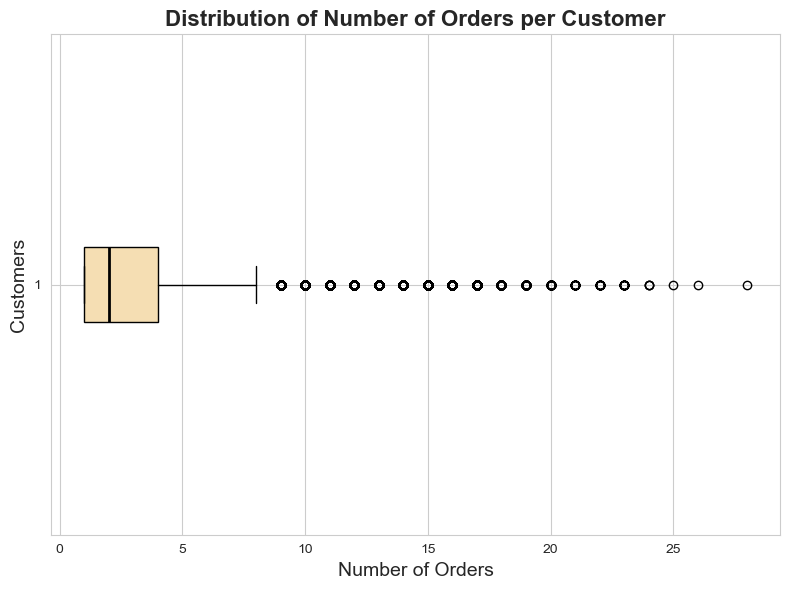

In [304]:
# Group by customer and count the number of orders per customer
order_counts = instacart_orders.groupby('user_id')['order_id'].count()

# Create the box plot for the distribution of the number of orders per customer
plt.figure(figsize=(8, 6))

# Box plot with custom colors for the mean line
plt.boxplot(order_counts, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='wheat', color='black'),
            medianprops=dict(color='black', linewidth=2),  # Color for the median line
            meanprops=dict(marker='o', markerfacecolor='red', markersize=6)  # Color for the mean line
           )

# Customize the plot
plt.title('Distribution of Number of Orders per Customer', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Customers', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis of Distribution of Number of Orders per Customer**

This box plot shows the distribution of the number of orders per customer. The box is concentrated on the lower end, indicating that most customers have a low order count. There are numerous outliers beyond the upper whisker, showing that some customers place significantly more orders than the majority. The plot confirms a skewed distribution, with a few high-frequency customers among mostly low-frequency ones.

  **Most customers have made very few orders, with the majority having between 1 and 5 orders**. The frequency sharply declines as the number of orders increases, indicating that only a small portion of customers are repeat buyers with higher order counts, so **most customers are low-frequency users**. 
  
--- 


#### 4.2.2. What are the 20 most popular products?

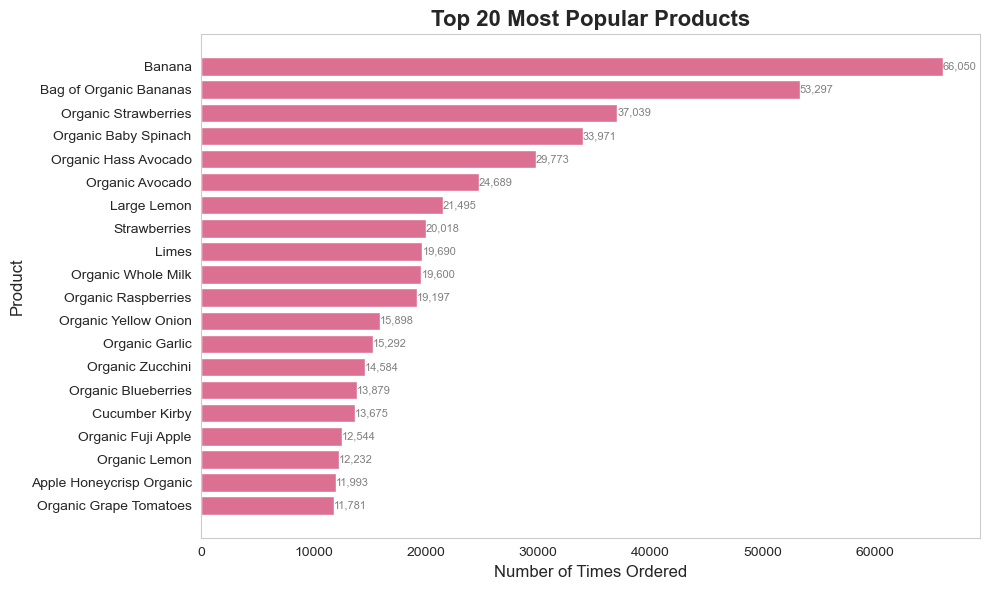

In [277]:
# Count the number of times each product appears in the orders
product_counts = order_products['product_id'].value_counts()


# Get the top 20 most popular products
top_20_products = product_counts.head(20)

# Convert to DataFrame for merging
top_20_products_df = top_20_products.reset_index()
top_20_products_df.columns = ['product_id', 'count']

# Merge with the products DataFrame to get the names
top_20_products_with_names = top_20_products_df.merge(products[['product_id', 'product_name']], on='product_id')

# Product names and their respective counts
product_names = top_20_products_with_names['product_name']
counts = top_20_products_with_names['count']

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(product_names, counts, color='palevioletred')

# Add the count on top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=8, color='gray')

# Titles and labels
plt.title('Top 20 Most Popular Products', fontsize=16, fontweight='bold')
plt.xlabel('Number of Times Ordered', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  # Invert the Y-axis so the most frequent product appears at the top

# Remove the grid
plt.grid(False)

# # Show the plot
plt.tight_layout()
plt.show()

**Analysis of Top 20 Most Popular Products**

**Bananas are the most popular, ordered over 66,000 times**. Organic products are highly represented in the list, including items like organic bananas, strawberries, and baby spinach, suggesting a **strong demand for organic produce**.

---

### 4.3  Analyzing Customer Purchase Patterns and Reordering Behavior in Instacart

The following questions will be analyzed

4.3.1. **How many items do people usually buy in a single order? What does the distribution look like?** 

4.3.2. **Which are the top 20 items most frequently reordered (show their product names and IDs)?**

4.3.3. **For each product, what is the reorder rate (number of reorders/total orders)?**

4.3.4. **For each customer, what proportion of their products ordered are reorders?** 

4.3.5. **Which are the top 20 items people add to their cart first (show the product IDs, names, and the number of times each was the first item added to the cart)?** 

---

####  4.3.1  How many items do people usually buy in a single order? What does the distribution look like?

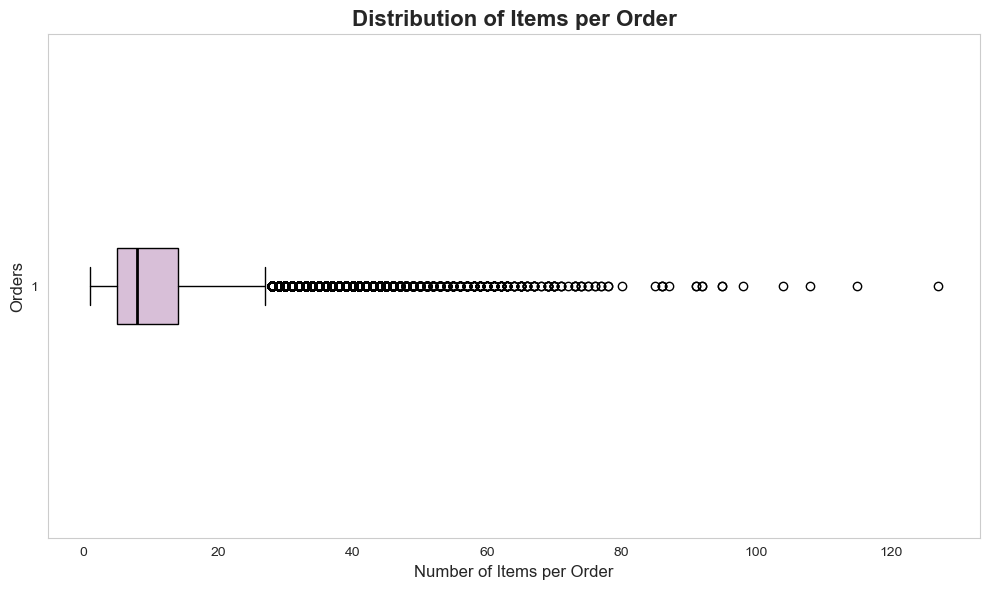

The average number of items per order is: 10.10


In [298]:
# Count the number of items in each order
items_per_order = order_products.groupby('order_id').size()

# Calculate the average number of items per order
mean_items = items_per_order.mean()

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(items_per_order, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='thistle', color='black'), 
            medianprops=dict(color='black', linewidth=2))

# Titles and labels
plt.title('Distribution of Items per Order', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items per Order', fontsize=12)
plt.ylabel('Orders', fontsize=12)

# Remove the grid for a cleaner look
plt.grid(False)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the average number of items per order
print(f"The average number of items per order is: {mean_items:.2f}")


**Analysis of the distribution of items per order**

- Most orders contain between 5-15 items. 
- The median appears to be around 10 items.
- There are many outliers (shown as circles) extending up to 120 items per order.
- The distribution is right-skewed, meaning while most orders are small, there are some very large orders.
- The minimum appears to be around 1-2 items per order.

Cstomers typically order 5-15 items, but some place much larger orders of up to 120 items.

---

#### 4.3.2. Which are the top 20 items most frequently reordered ?

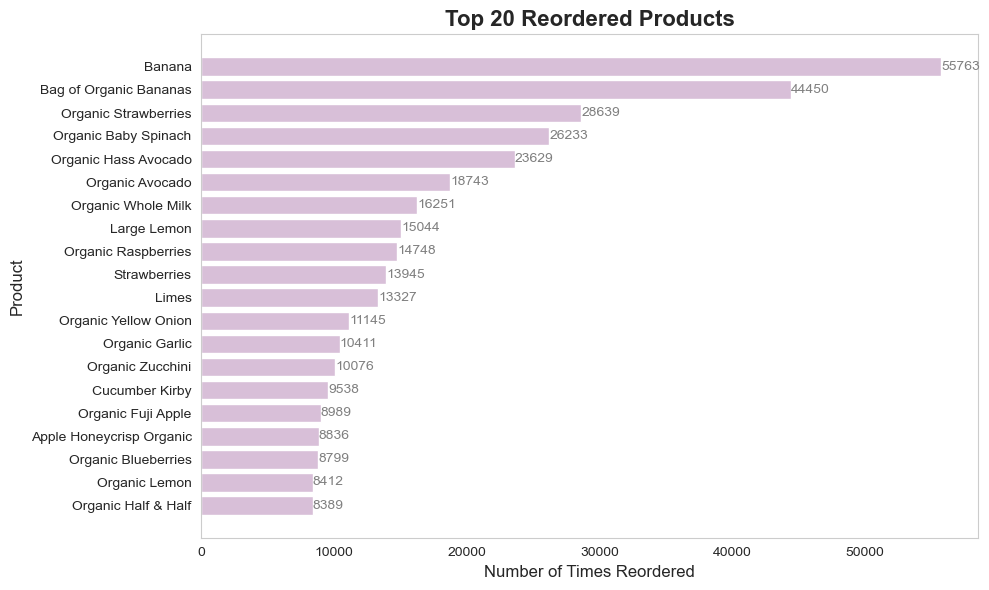

In [279]:
# Filter only the products that have been reordered
reordered_products = order_products[order_products['reordered'] == 1]

# Count how many times each product was reordered using value_counts()
reordered_counts = reordered_products['product_id'].value_counts().head(20)

# Convert to DataFrame for better readability
top_reordered = pd.DataFrame(reordered_counts).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

# Merge with the products DataFrame to get the product names
top_reordered = pd.merge(top_reordered, products[['product_id', 'product_name']], on='product_id')

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='thistle', edgecolor='white')

# Add the reorder count on top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=10, color='gray')

# Customize the chart
plt.title('Top 20 Reordered Products', fontsize=16, fontweight='bold')
plt.xlabel('Number of Times Reordered', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  # Invert the Y-axis so the most reordered product appears at the top

# Remove the grid
plt.grid(False)

# # Show the plot
plt.tight_layout()
plt.show()

**Analysis of the Top 20 Reordered Products**

1. Bananas dominate reorders with 55,763 reorders.
2. Organic Bananas are second with 44,450 reorders.
3. There's a significant drop to third place (Organic Strawberries with 28,639).
4. Fresh produce (fruits and vegetables) makes up most of the top items.
5. Organic products are heavily represented.
6. Only two non-produce items appear: Organic Whole Milk and Organic Half & Half.
7. The lowest item (Organic Half & Half) has 8,389 reorders.

This suggests customers frequently repurchase fresh produce, particularly bananas, and prefer organic options.

---

#### 4.3.3 For each product, what is the reorder rate?*


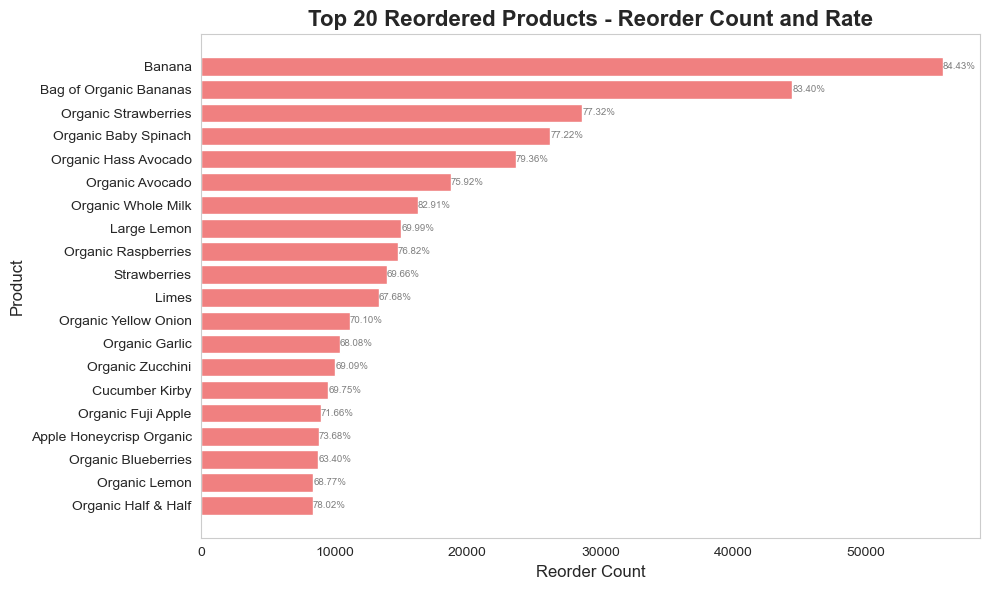

In [280]:
# Filter only the products that have been reordered
reordered_products = order_products[order_products['reordered'] == 1]

# Count how many times each product was reordered
reordered_counts = reordered_products['product_id'].value_counts().head(20)

# Count the total number of orders for each product
total_orders_counts = order_products['product_id'].value_counts()

# Create a DataFrame with reorder counts and total orders
top_reordered = pd.DataFrame(reordered_counts).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

# Merge with the products DataFrame to get the product names
top_reordered = pd.merge(top_reordered, products[['product_id', 'product_name']], on='product_id')

# Calculate the total orders for each product in the top reordered list
top_reordered['total_orders'] = top_reordered['product_id'].map(total_orders_counts)

# Calculate the reorder rate for each product
top_reordered['reorder_rate'] = top_reordered['reorder_count'] / top_reordered['total_orders']

# Sort the products by reorder count
top_reordered = top_reordered.sort_values(by='reorder_count', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Bar chart 
plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='lightcoral', edgecolor='white')

# Add reorder rate as text labels on the bars
for i, (count, rate) in enumerate(zip(top_reordered['reorder_count'], top_reordered['reorder_rate'])):
    plt.text(count + 1, i, f'{rate:.2%}', va='center', color='gray', fontsize=7)

# Titles and labels
plt.title('Top 20 Reordered Products - Reorder Count and Rate', fontsize=16, fontweight='bold')
plt.xlabel('Reorder Count', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  # Invert the Y-axis so the most reordered product appears at the top

# Remove the grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis of the Reorder count and Reorder rate (%) for "The Top 20 Products"**

1. Banana leads with ~50,000 reorders and the highest reorder rate of 84.43%.
2. Organic Bananas follow with ~40,000 reorders and 83.40% reorder rate.
3. Most products have reorder rates between 65-80%.
4. Organic Half & Half has the lowest reorder rate at 75.02%.
5. The reorder rates are relatively high across all products (>75%), suggesting these are staple items that customers regularly repurchase.
6. Despite different reorder counts, the reorder rates are fairly consistent, indicating strong customer loyalty across these products.

This data shows these products are not just frequently reordered but also have high customer retention rates.

---

####  4.3.4 For each customer, what proportion of their products ordered are reorders?

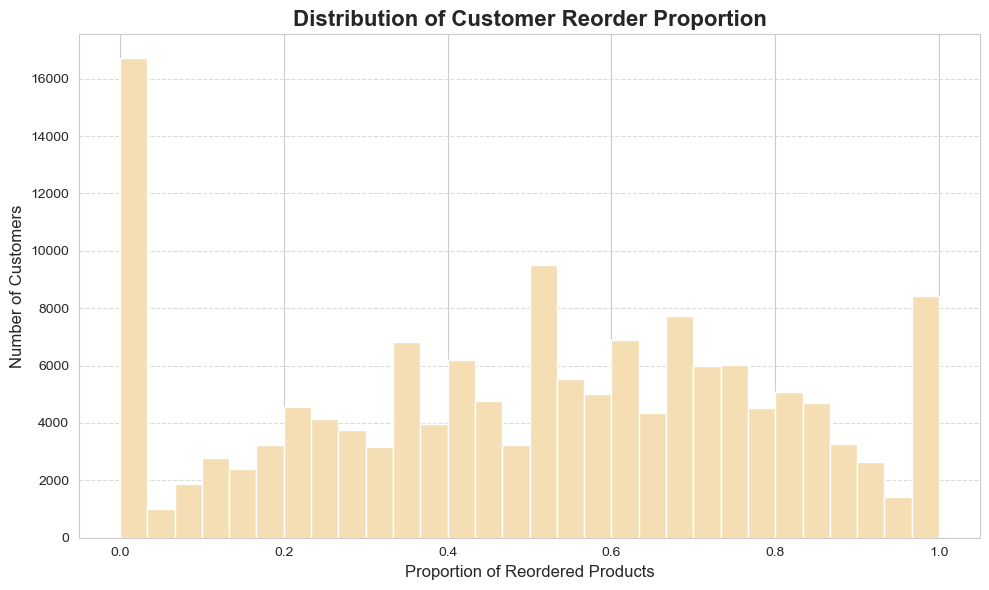

In [291]:
# Merging `instacart_orders` with `order_products` on 'order_id' to get product reorders
pro_reorders = instacart_orders.merge(order_products, on='order_id', how='inner')

# Calculate the proportion of reordered products for each customer
customer_reorder_proportion = pro_reorders.groupby('user_id')['reordered'].mean()

# Plot the customer reorder proportion
plt.figure(figsize=(10, 6))
plt.hist(customer_reorder_proportion, bins=30, color='wheat', edgecolor='white')

# Title and labels
plt.title("Distribution of Customer Reorder Proportion", fontsize=16, fontweight='bold')
plt.xlabel("Proportion of Reordered Products", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



**Analysis of how customers behave with reordering products**

1. There's a large spike at 0.0, showing many customers (~16,000) never reorder products
2. Another notable spike at 1.0, indicating ~8,000 customers reorder all their products
3. Between these extremes, there's a relatively even distribution with some peaks:
   - A peak around 0.5-0.6 (~9,000 customers)
   - Consistent activity in the 0.2-0.8 range (~4,000-7,000 customers per bracket)
4. The distribution suggests three main customer types:
   - One-time shoppers (0.0)
   - Mixed behavior shoppers (0.2-0.8)
   - Highly loyal customers (1.0)

This indicates a diverse customer base with varying loyalty patterns.

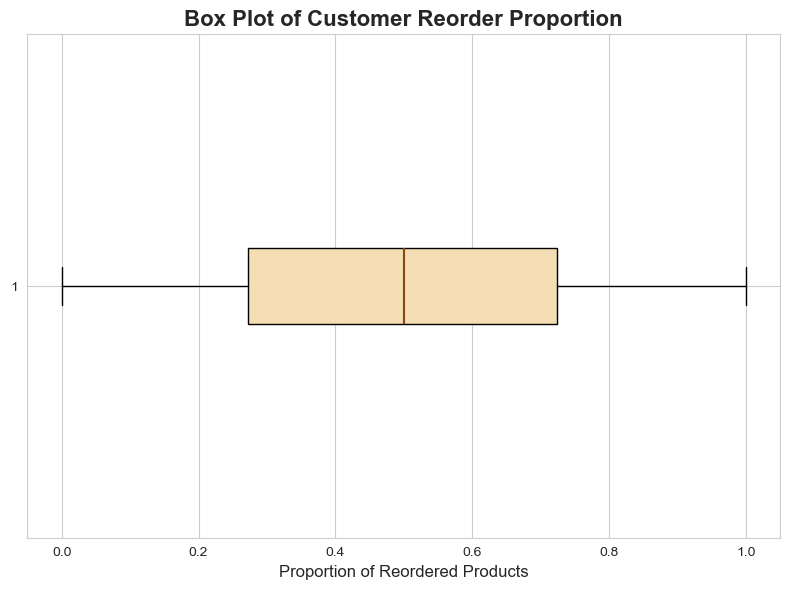

In [296]:
import matplotlib.pyplot as plt

# Calculate the proportion of reordered products for each customer
customer_reorder_proportion = pro_reorders.groupby('user_id')['reordered'].mean()

# Plot the customer reorder proportion as a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(customer_reorder_proportion, vert=False, patch_artist=True,
            boxprops=dict(facecolor='wheat', color='black'),
            medianprops=dict(color='saddlebrown', linewidth=1.5))

# Title and labels
plt.title("Box Plot of Customer Reorder Proportion", fontsize=16, fontweight='bold')
plt.xlabel("Proportion of Reordered Products", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis of Box Plot of Customer Reorder Proportion** 
1. The median (blue line) is around 0.5, meaning half of customers reorder more than 50% of their products
2. The box (interquartile range) extends from about 0.3 to 0.7, showing the middle 50% of customers reorder between 30-70% of their products
3. The whiskers extend from 0 to 1, indicating the full range from customers who never reorder (0) to those who reorder everything (1)
4. The distribution appears fairly symmetric around the median
5. No outliers are shown, suggesting this is a natural spread of customer behavior

This indicates a balanced distribution of reorder behavior across the customer base.

---

#### 4.3.5 Which are the top 20 items people add to their cart first (show the product IDs, names, and the number of times each was the first item added to the cart)?

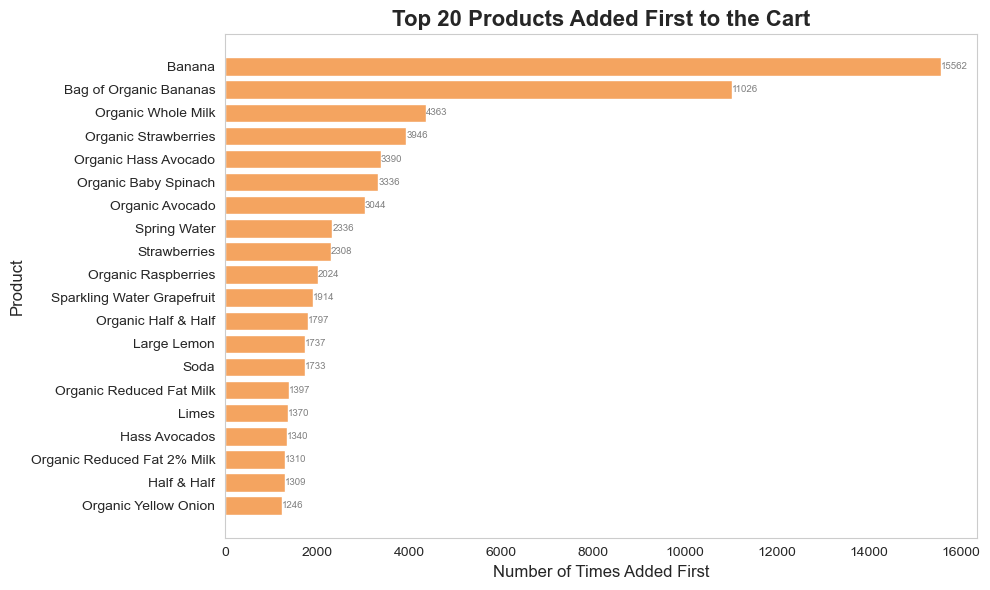

In [300]:
# Filter products that were added first to the cart
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

# Count how many times each product was added first to the cart
top_first_added_products = first_added_products['product_id'].value_counts().head(20)

# Convert to DataFrame for easier merging
top_first_added_products_df = top_first_added_products.reset_index()
top_first_added_products_df.columns = ['product_id', 'count']

# Merge with the products DataFrame to get product names
top_first_added_products_with_names = top_first_added_products_df.merge(products[['product_id', 'product_name']], on='product_id')

# Extract product names and their respective counts
product_names = top_first_added_products_with_names['product_name']
counts = top_first_added_products_with_names['count']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(product_names, counts, color='sandybrown', edgecolor='white')

# Add count on top of each bar for better readability
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', fontsize=7, color='gray')

# Customize the chart
plt.title('Top 20 Products Added First to the Cart', fontsize=16, fontweight='bold')
plt.xlabel('Number of Times Added First', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  # Invert the Y-axis to show the most frequent product at the top

# Remove the grid
plt.grid(False)

# # Show the plot
plt.tight_layout()
plt.show()

**Analysis of which products customers typically add first to their shopping carts**

1. Bananas are overwhelmingly the first choice (15,502 times).
2. Organic Bananas are second (11,026 times).
3. Organic Whole Milk is third (4,063 times).
4. There's a significant drop between the top 2 items and the rest.
5. Beverages appear multiple times (Spring Water, Sparkling Water, Soda).
6. Dairy products are well-represented (various milks and Half & Half).
7. The lowest (Organic Yellow Onion) was added first 1,246 times.

This suggests customers typically start their shopping with staples like bananas and milk, followed by other produce and beverages.

---

## 5.  Conclusion of the project

1. **Ordering Behavior**:
- Peak ordering hours are between 10 AM and 5 PM, with highest activity around 2-3 PM.
- Very low activity between midnight and 6 AM.
- Sunday and Monday are the busiest ordering days (~84,000 orders each).
- Weekdays show lower but consistent order volumes (~60,000 orders).

2. **Customer Loyalty**:
- Most customers reorder within 7 days of their previous order.
- There's a strong weekly shopping pattern (spike at 7 days).
- Monthly shoppers also evident (spike at 30 days).
- About 50% of customers reorder more than half their products.

3. **Shopping Patterns**:
- Weekday vs Weekend differences exist (comparing Wednesday vs Saturday).
- Weekend orders start later in the day.
- Bananas are consistently the most popular item (both regular and organic).
- Most orders contain 5-15 items, with some large orders reaching 120 items.

4. **Business Implications**:
- Need strong inventory during Sunday-Monday peak.
- Critical to maintain stock during 10 AM - 5 PM window.
- Focus on weekly customer retention (7-day cycle).
- Ensure best selling products (especially bananas) are well-stocked.
- Plan staffing around peak hours and days, like online shopping assitance agents.